In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [124]:
data = pd.read_csv("covtype.data")
df = pd.DataFrame(data)
# df = df.sample(n=50000)
df.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


# **Cover type distribution**

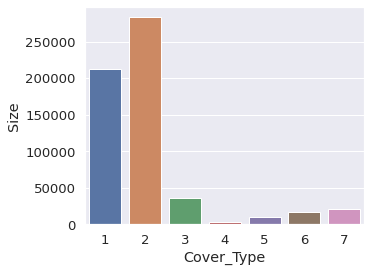

In [125]:
class_dist=df.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(5,4))
sns.barplot(x=class_label.index,y='Size',data=class_label)

# **Correlation matrix**

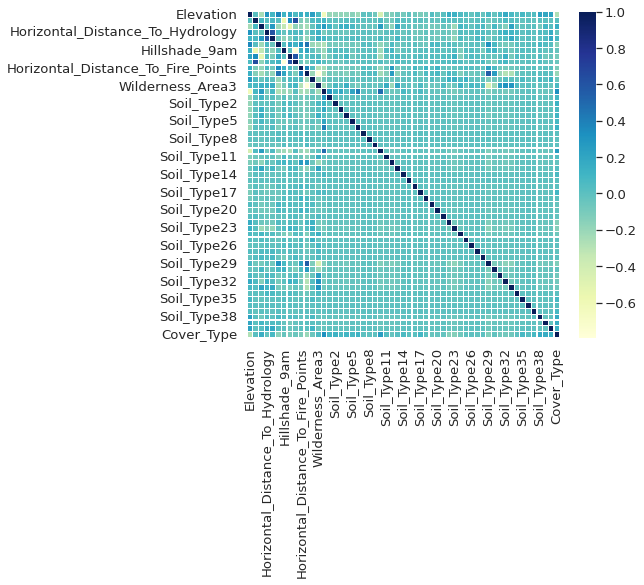

In [126]:
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df.corr(), ax=ax, cmap="YlGnBu", linewidths=0.1)

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df.drop(['Cover_Type'] , axis = 1)
y = df['Cover_Type']

In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def report(y_test, y_pred):
  print(classification_report(y_test,y_pred))

  cm = confusion_matrix(y_pred, y_test)
  plt.figure(figsize=(7, 5))
  sns.set(font_scale=1.2)
  sns.heatmap(cm, annot=True, fmt='g')
  plt.show()

# **Features selection and normalization**

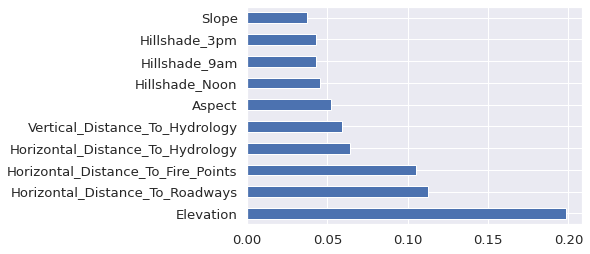

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [129]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
model2 = SelectFromModel(model, prefit=True)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

New_features = model2.transform(X)

scaler = MinMaxScaler()
scaler.fit(New_features)
X_scaled = scaler.transform(New_features)

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state=42)

# **Random forest classifier**

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63619
           2       0.94      0.97      0.95     85042
           3       0.94      0.95      0.94     10692
           4       0.90      0.83      0.86       819
           5       0.95      0.69      0.80      2861
           6       0.93      0.86      0.89      5201
           7       0.98      0.93      0.95      6070

    accuracy                           0.95    174304
   macro avg       0.94      0.88      0.91    174304
weighted avg       0.95      0.95      0.95    174304



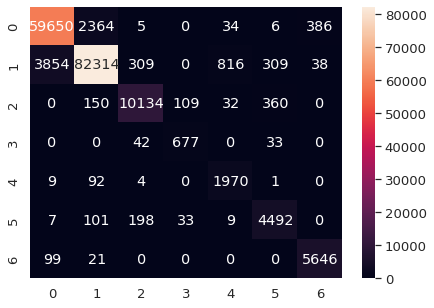

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
# rs_space={'bootstrap': [True],
#           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#           'max_features': ['auto', 'sqrt'],
#           'min_samples_leaf': [1, 2, 4],
#           'min_samples_split': [2, 5, 10],
#           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# rf = RandomForestClassifier()

# rf_random = RandomizedSearchCV(model, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
# model_random = rf_random.fit(X_train,y_train)
report(y_test, y_pred)

In [131]:
# y_pred = model_random.predict(X_test)
# model_random.score(X_test,y_test)

# **LogisticRegression**

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.68      0.68     63619
           2       0.70      0.81      0.75     85042
           3       0.58      0.60      0.59     10692
           4       0.00      0.00      0.00       819
           5       0.00      0.00      0.00      2861
           6       0.41      0.00      0.01      5201
           7       0.61      0.01      0.01      6070

    accuracy                           0.68    174304
   macro avg       0.42      0.30      0.29    174304
weighted avg       0.65      0.68      0.65    174304



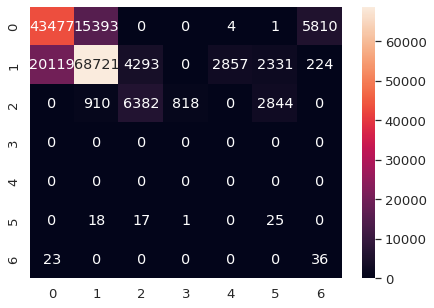

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logic_model = LogisticRegression(
    solver='liblinear',
    C=0.05,
    multi_class='ovr',
    random_state=0,
)
logic_model.fit(X_train, y_train)
y_pred = logic_model.predict(X_test)
logic_model.score(X_test,y_test)
# param_grid = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }]

# clf = GridSearchCV(logic_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = clf.fit(X_train,y_train)
# best_clf.score()
report(y_test, y_pred)


# **Decision tree clasifier**

              precision    recall  f1-score   support

           1       0.92      0.92      0.92     63619
           2       0.93      0.93      0.93     85042
           3       0.90      0.90      0.90     10692
           4       0.81      0.81      0.81       819
           5       0.78      0.76      0.77      2861
           6       0.84      0.83      0.83      5201
           7       0.92      0.92      0.92      6070

    accuracy                           0.92    174304
   macro avg       0.87      0.87      0.87    174304
weighted avg       0.92      0.92      0.92    174304



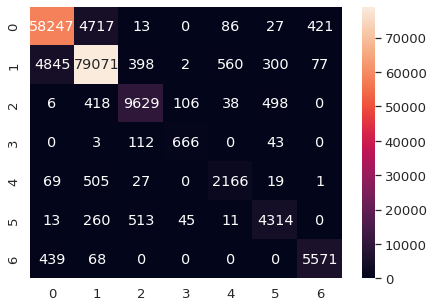

In [136]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
decision_tree_model.score(X_test,y_test)
report(y_test, y_pred)


# ***KNeighborsClassifier***

              precision    recall  f1-score   support

           1       0.92      0.92      0.92     63619
           2       0.93      0.94      0.93     85042
           3       0.90      0.90      0.90     10692
           4       0.85      0.74      0.79       819
           5       0.82      0.74      0.77      2861
           6       0.83      0.81      0.82      5201
           7       0.93      0.93      0.93      6070

    accuracy                           0.92    174304
   macro avg       0.88      0.85      0.87    174304
weighted avg       0.92      0.92      0.92    174304



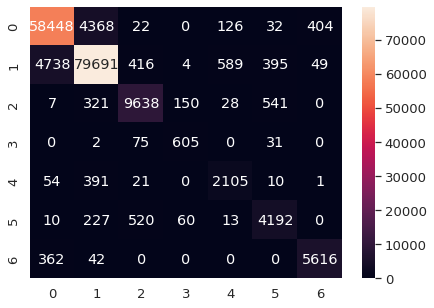

In [137]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=3)
kn_model.fit(X_train, y_train)
y_pred = kn_model.predict(X_test)
kn_model.score(X_test,y_test)
report(y_test, y_pred)

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_curve